In [2]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/cf/24/271e77c22724f370c24c705f394b8035b4d27e4c2c6339f3f45ab9b8258e/tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.18.0 from https://files.pythonhosted.org/packages/76/ad/fa6c508a15ff79cb5409294c293388e0999b7d480f84b65e4287277434fe/tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for fl

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.0.2 which is incompatible.
scipy 1.11.1 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.0.2 which is incompatible.


   -------------------------- ------------- 261.5/390.2 MB 5.7 MB/s eta 0:00:23
   -------------------------- ------------- 261.6/390.2 MB 5.6 MB/s eta 0:00:23
   -------------------------- ------------- 261.7/390.2 MB 5.5 MB/s eta 0:00:24
   -------------------------- ------------- 261.7/390.2 MB 5.4 MB/s eta 0:00:24
   -------------------------- ------------- 261.7/390.2 MB 5.4 MB/s eta 0:00:24
   -------------------------- ------------- 261.8/390.2 MB 5.2 MB/s eta 0:00:25
   -------------------------- ------------- 261.8/390.2 MB 5.1 MB/s eta 0:00:26
   -------------------------- ------------- 261.8/390.2 MB 5.1 MB/s eta 0:00:26
   -------------------------- ------------- 261.8/390.2 MB 4.8 MB/s eta 0:00:27
   -------------------------- ------------- 261.9/390.2 MB 4.7 MB/s eta 0:00:28
   -------------------------- ------------- 261.9/390.2 MB 4.7 MB/s eta 0:00:28
   -------------------------- ------------- 261.9/390.2 MB 4.7 MB/s eta 0:00:28
   -------------------------- ----------

In [4]:
pip install numpy==1.26.0 --user

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np

C:\Users\91935\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
mnist= tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
#normalise values from 0-255 to 0-1
x_train=x_train / 255
xtest= x_test/255

In [4]:
#to see image shape using first image
imglen,imgwidth =x_train[0].shape
print(imglen,"x",imgwidth)

28 x 28


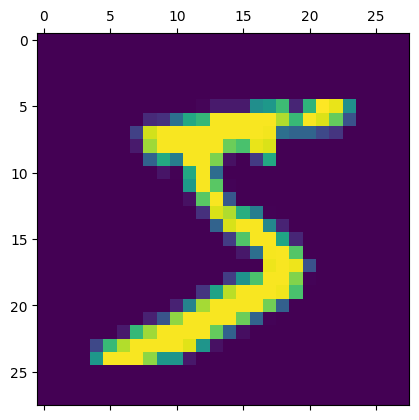

In [5]:
#to see how first image looks
plt.matshow(x_train[0])

In [6]:
#defining model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])
#neuron number , activation function

C:\Users\91935\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
#training model using SGD
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7371 - loss: 0.9981 - val_accuracy: 0.8986 - val_loss: 38.2239
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9031 - loss: 0.3527 - val_accuracy: 0.9158 - val_loss: 36.3615
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9137 - loss: 0.3020 - val_accuracy: 0.9199 - val_loss: 36.0488
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9250 - loss: 0.2671 - val_accuracy: 0.9272 - val_loss: 32.9401
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9327 - loss: 0.2400 - val_accuracy: 0.9299 - val_loss: 31.8871
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9381 - loss: 0.2207 - val_accuracy: 0.9359 - val_loss: 30.2960
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9423 - loss: 0.2030 - val_accuracy: 0.9384 - val_loss: 27.7076
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9464 - loss: 0.

In [10]:
#evaluate network
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9433 - loss: 25.9321
Loss = 22.744
Accuracy = 0.950


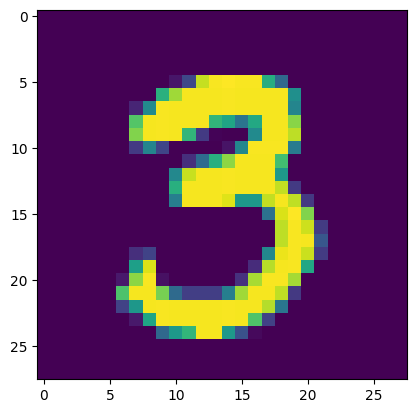

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


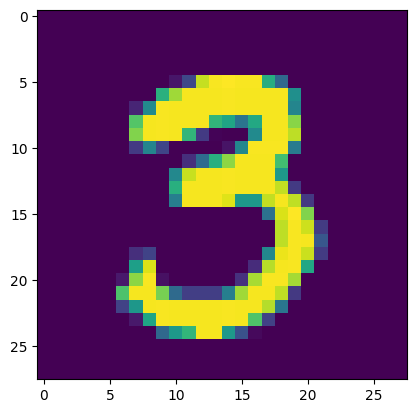

In [11]:
#Making Prediction on New Data
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [12]:
print('Predicted Value: ',predicted_value[n])
# Print the predicted probabilities for that image

Predicted Value:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


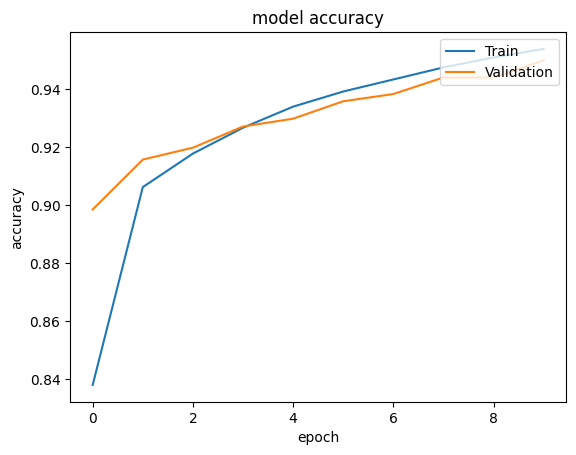

In [14]:
#plotting traing  accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

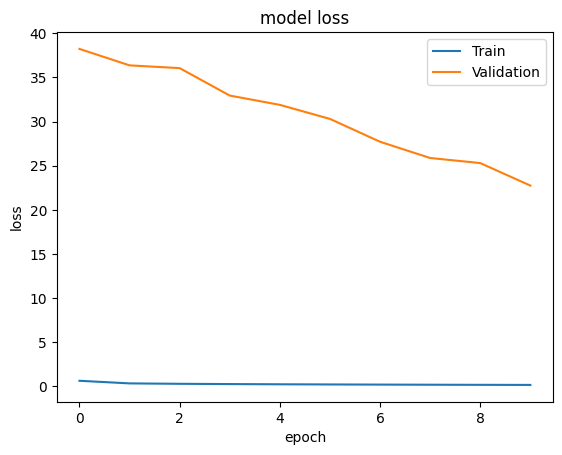

In [15]:
#plotting traing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [16]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 967    0    1    2    1    0    3    2    4    0]
 [   0 1109    2    2    1    0    3    2   16    0]
 [   8    1  970    8    8    0    4    9   21    3]
 [   1    0    5  973    0    3    0    7   17    4]
 [   1    1    3    0  932    0    8    1    5   31]
 [  10    2    1   37    6  782   10    3   33    8]
 [  11    3    2    2   10    6  912    3    9    0]
 [   2    7   21    7    3    0    0  963    1   24]
 [   4    1    0    9    4    2    5    7  938    4]
 [   8    5    1   10   13    1    1    6   10  954]], shape=(10, 10), dtype=int32)
